In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Tshepo\Downloads\xclara.csv")
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


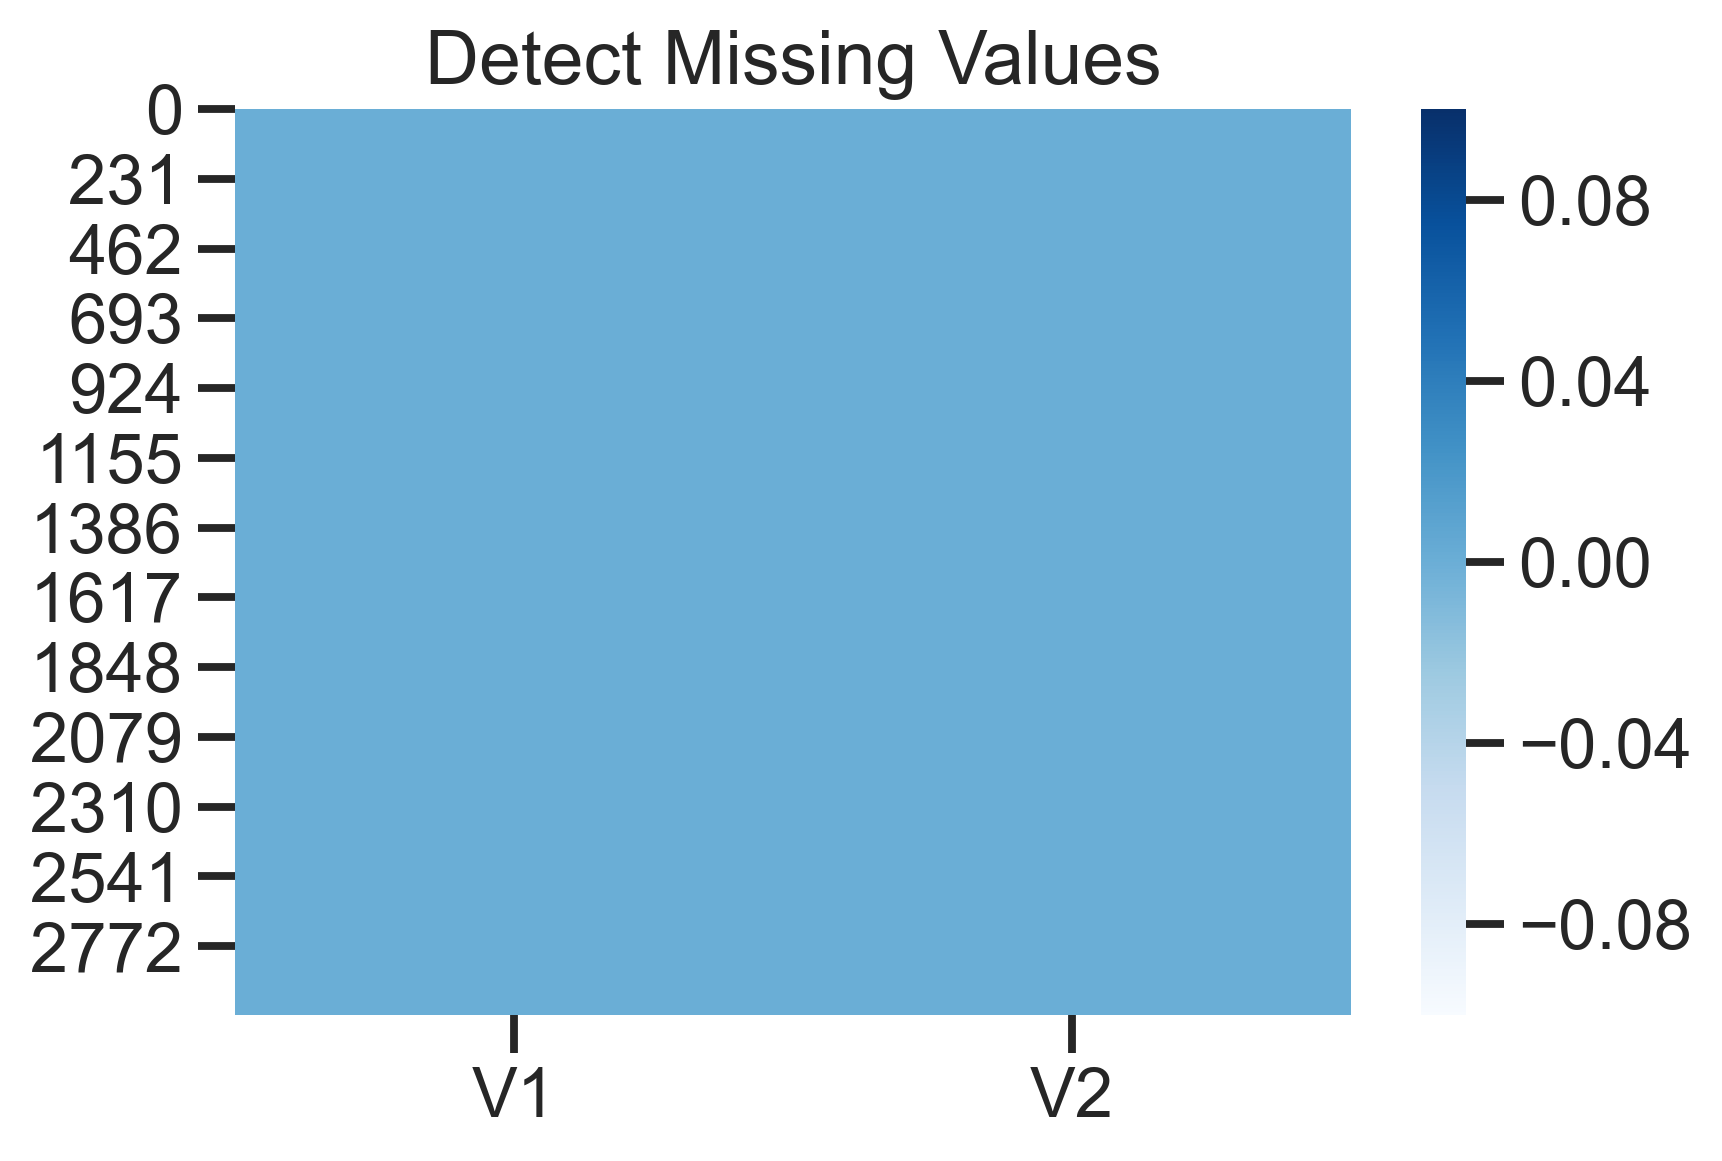

In [5]:
sns.heatmap(df.isnull(),cmap="Blues")
plt.title("Detect Missing Values")
plt.show()

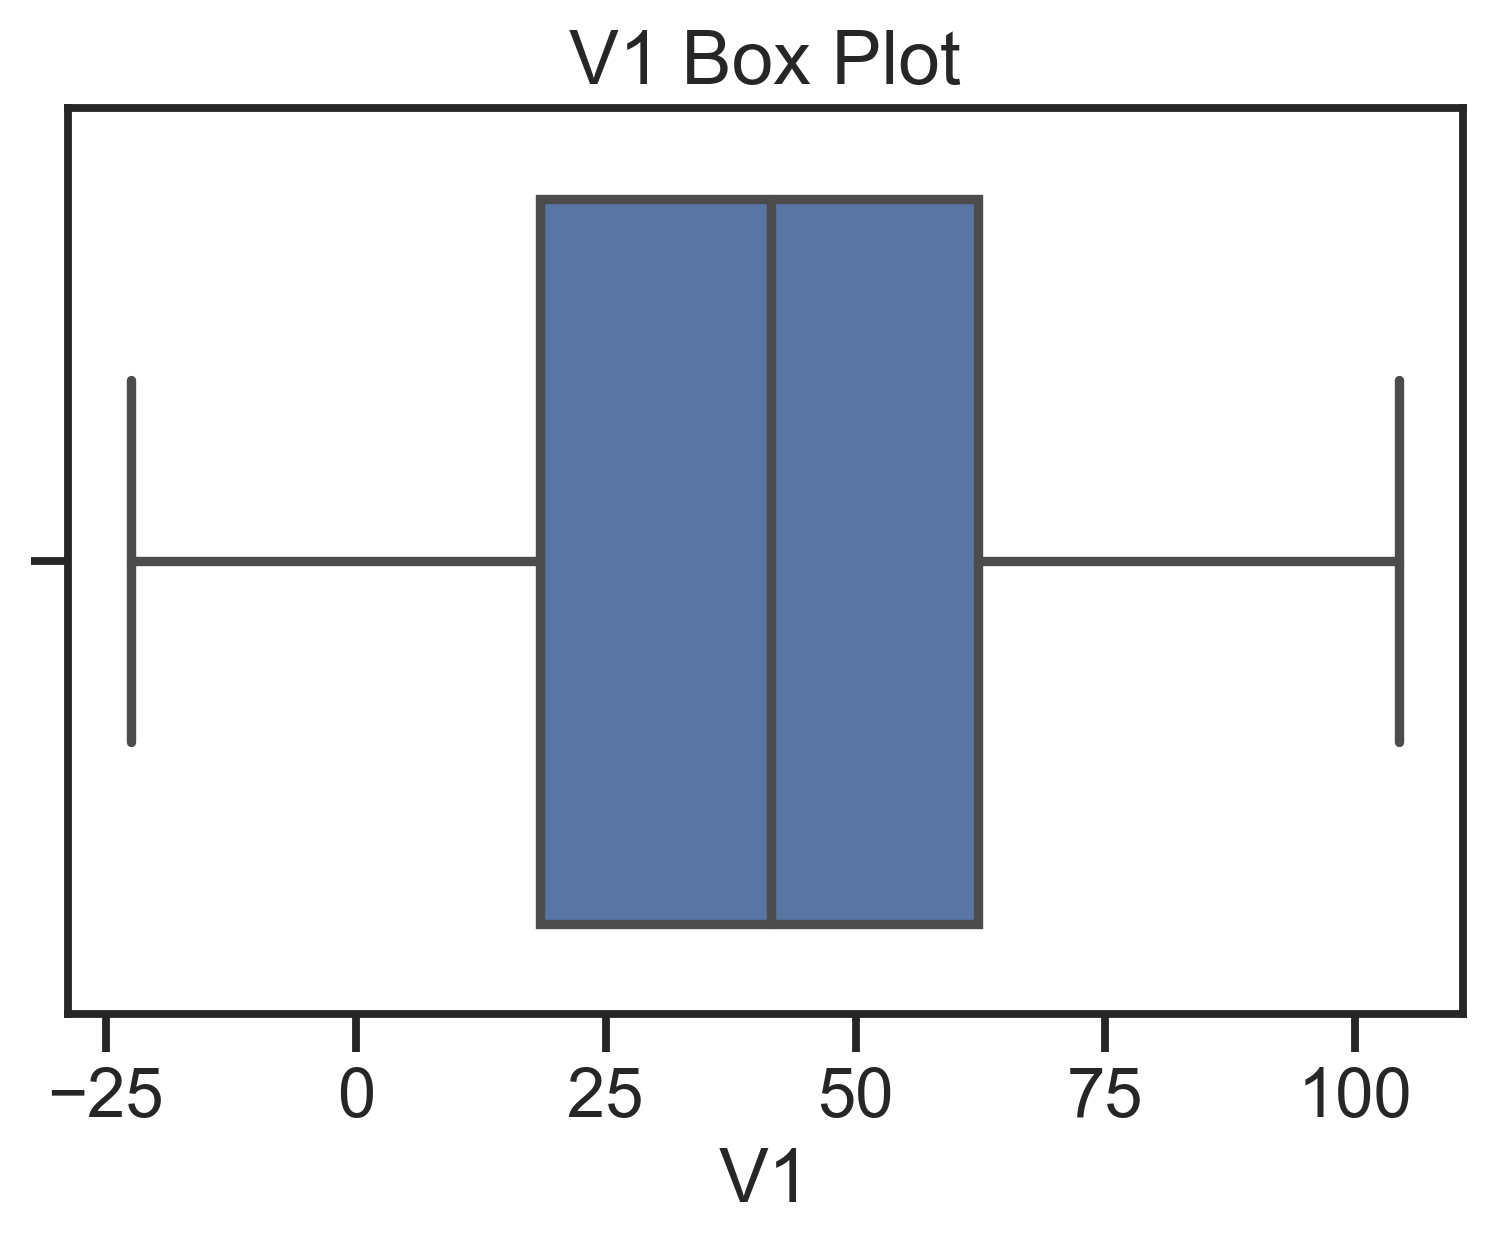

In [6]:
sns.boxplot(df["V1"])
plt.title("V1 Box Plot")
plt.show()

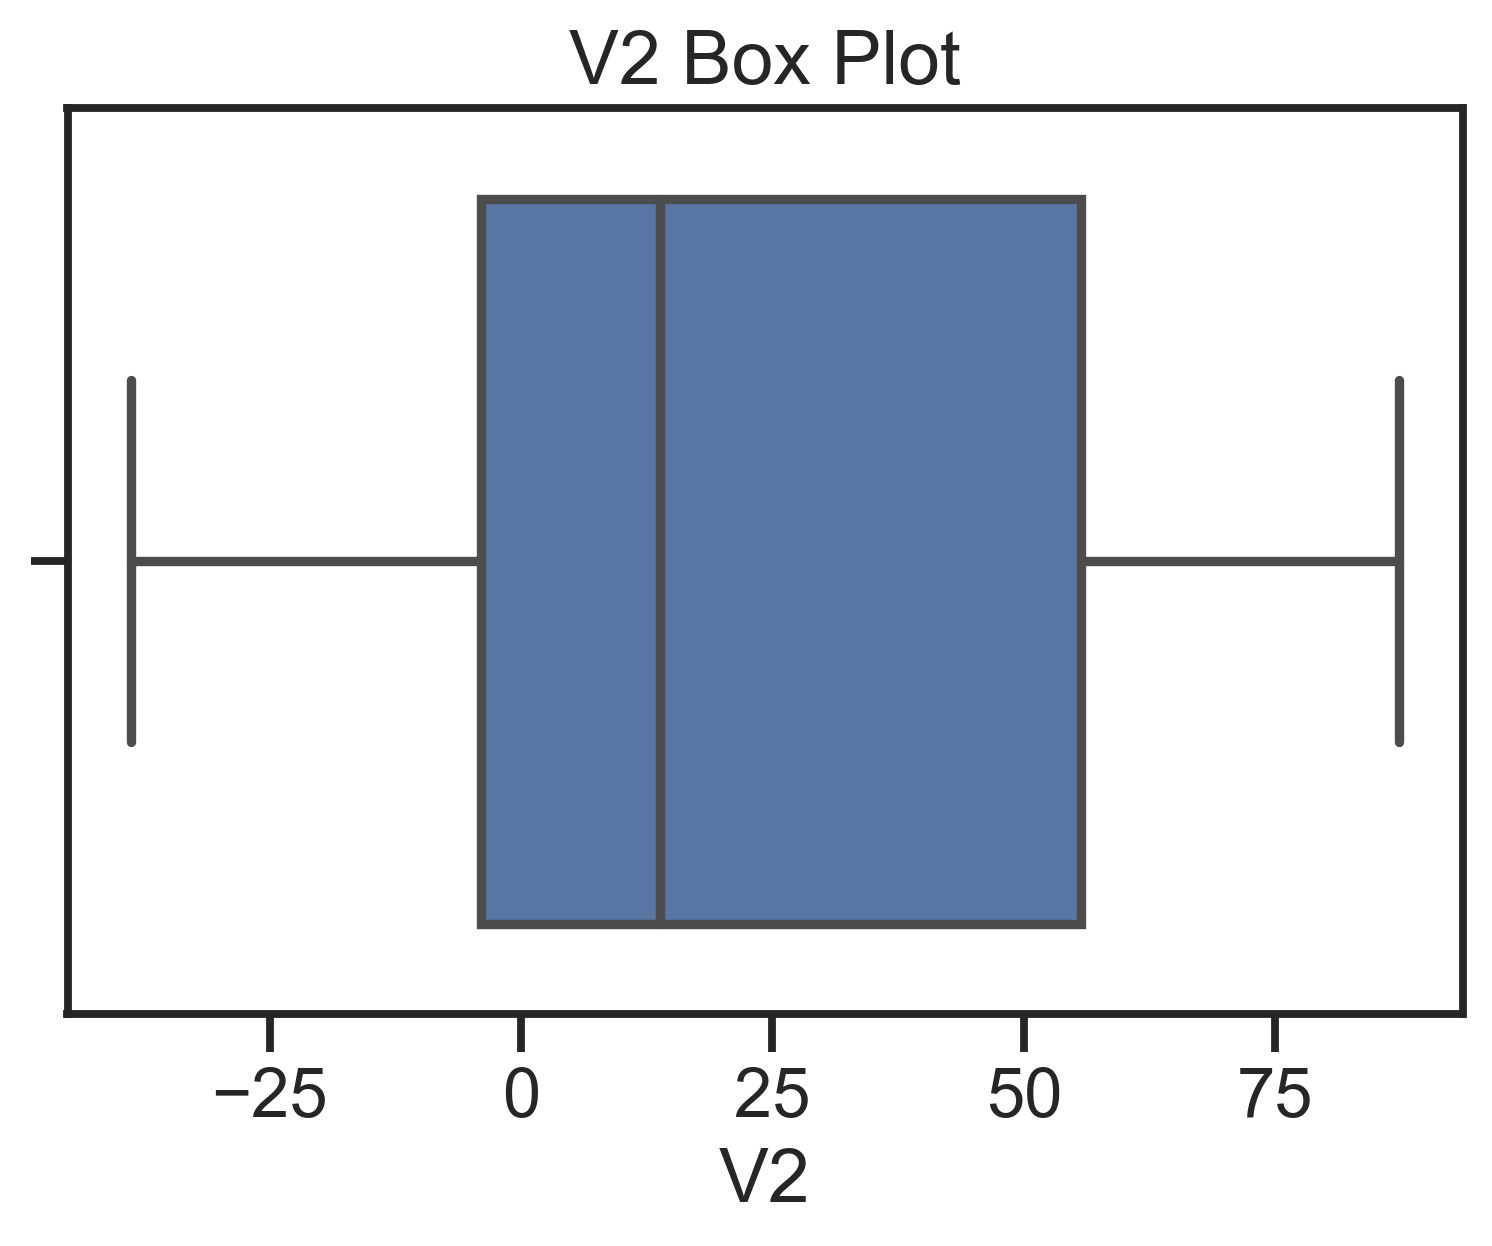

In [9]:
sns.boxplot(df["V2"])
plt.title("V2 Box Plot")
plt.show()

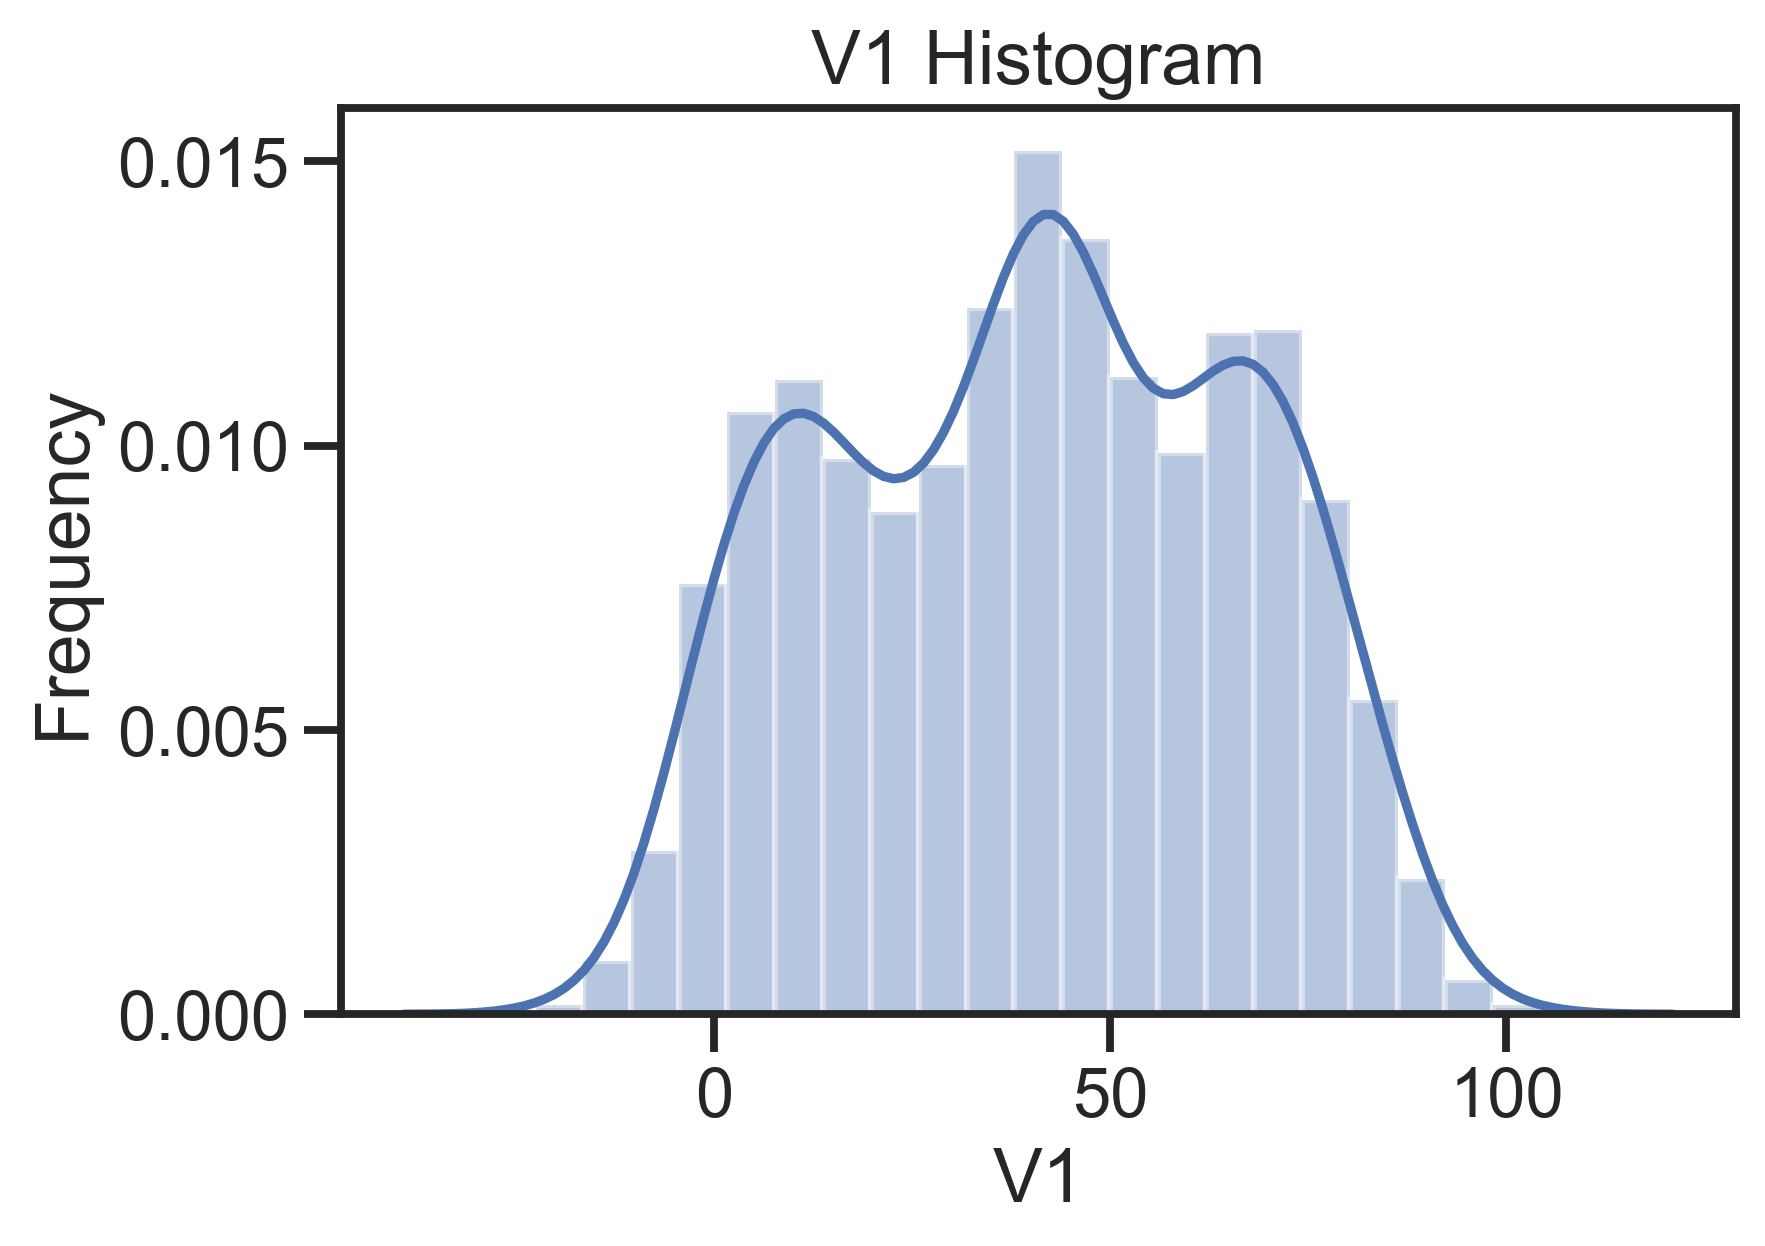

In [10]:
sns.distplot(df["V1"])
plt.title("V1 Histogram")
plt.ylabel("Frequency")
plt.show()

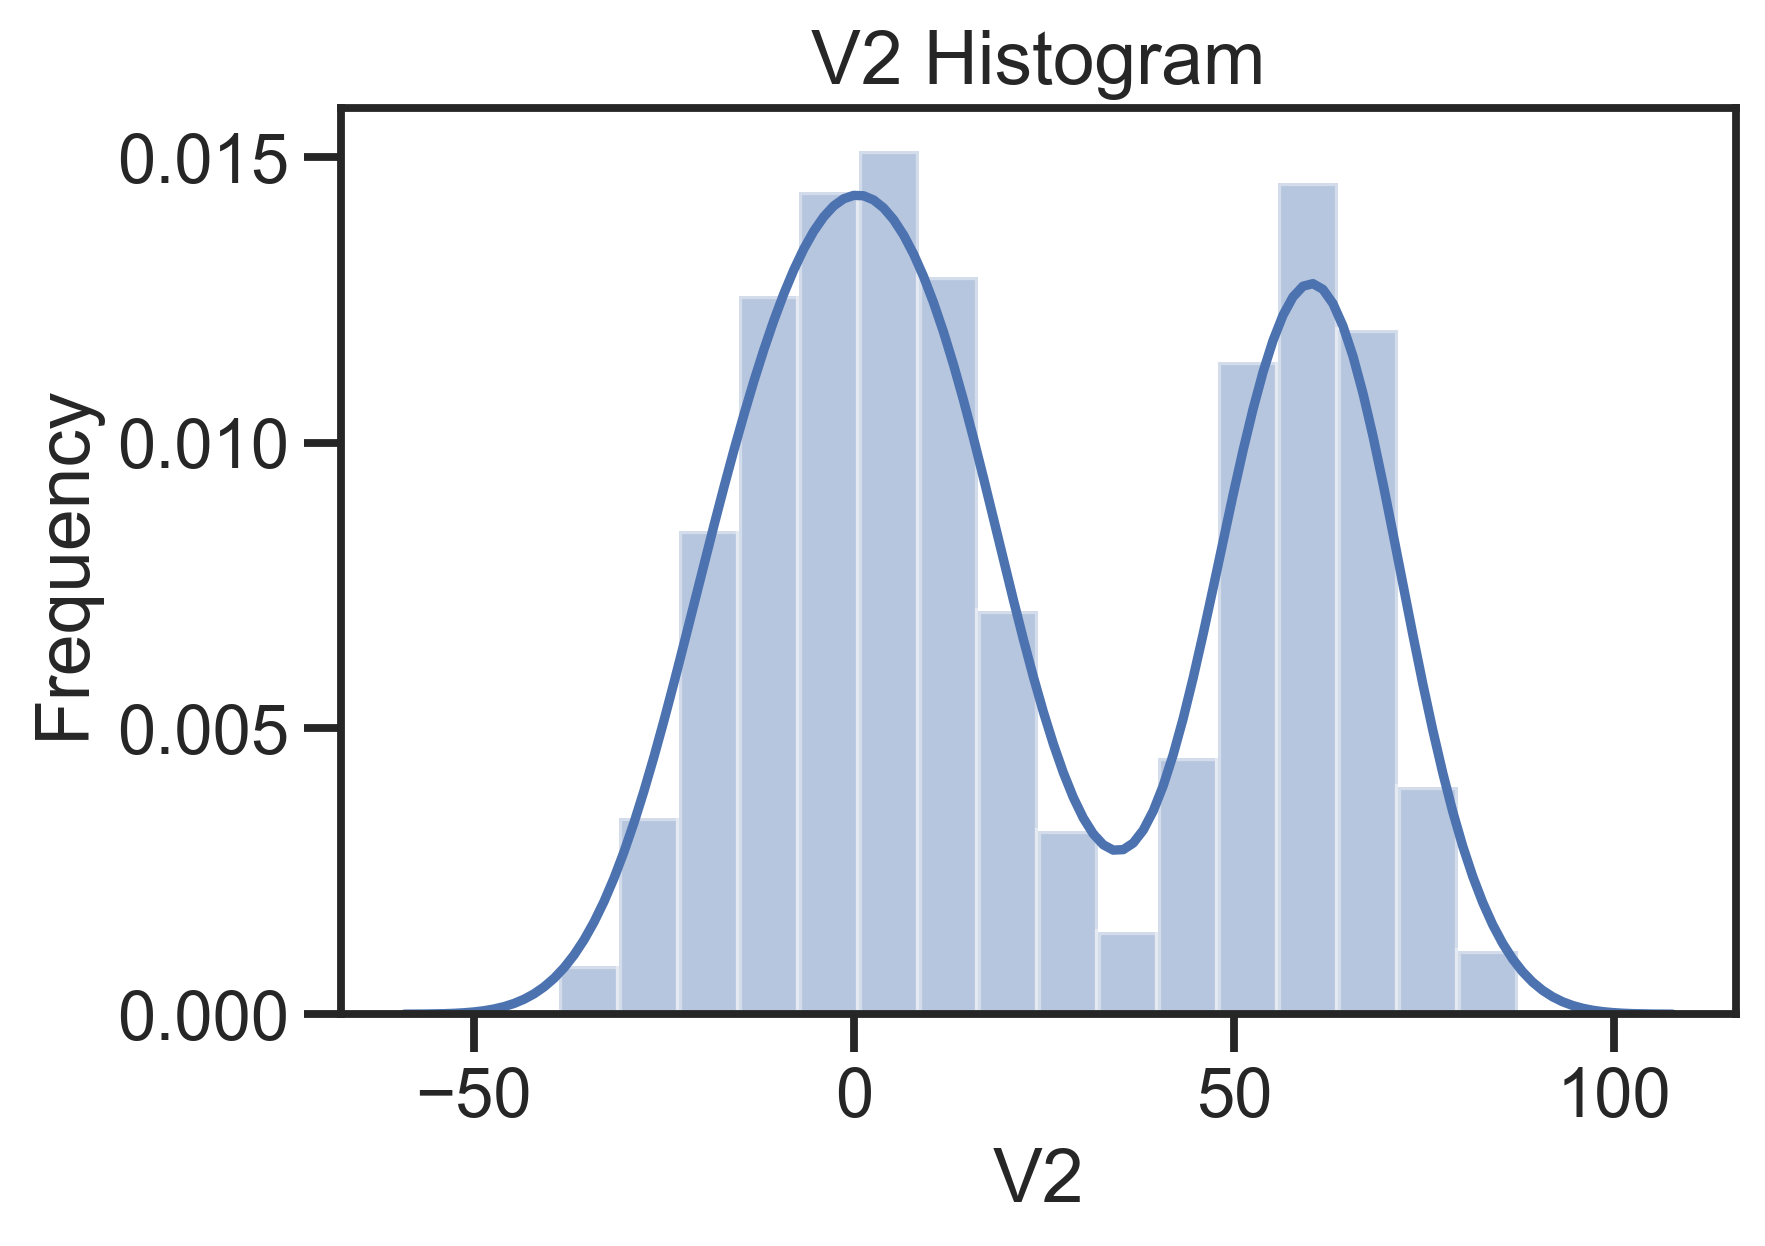

In [11]:
sns.distplot(df["V2"])
plt.title("V2 Histogram")
plt.ylabel("Frequency")
plt.show()

In [12]:
X = df[["V1"]]
Y = df[["V2"]]

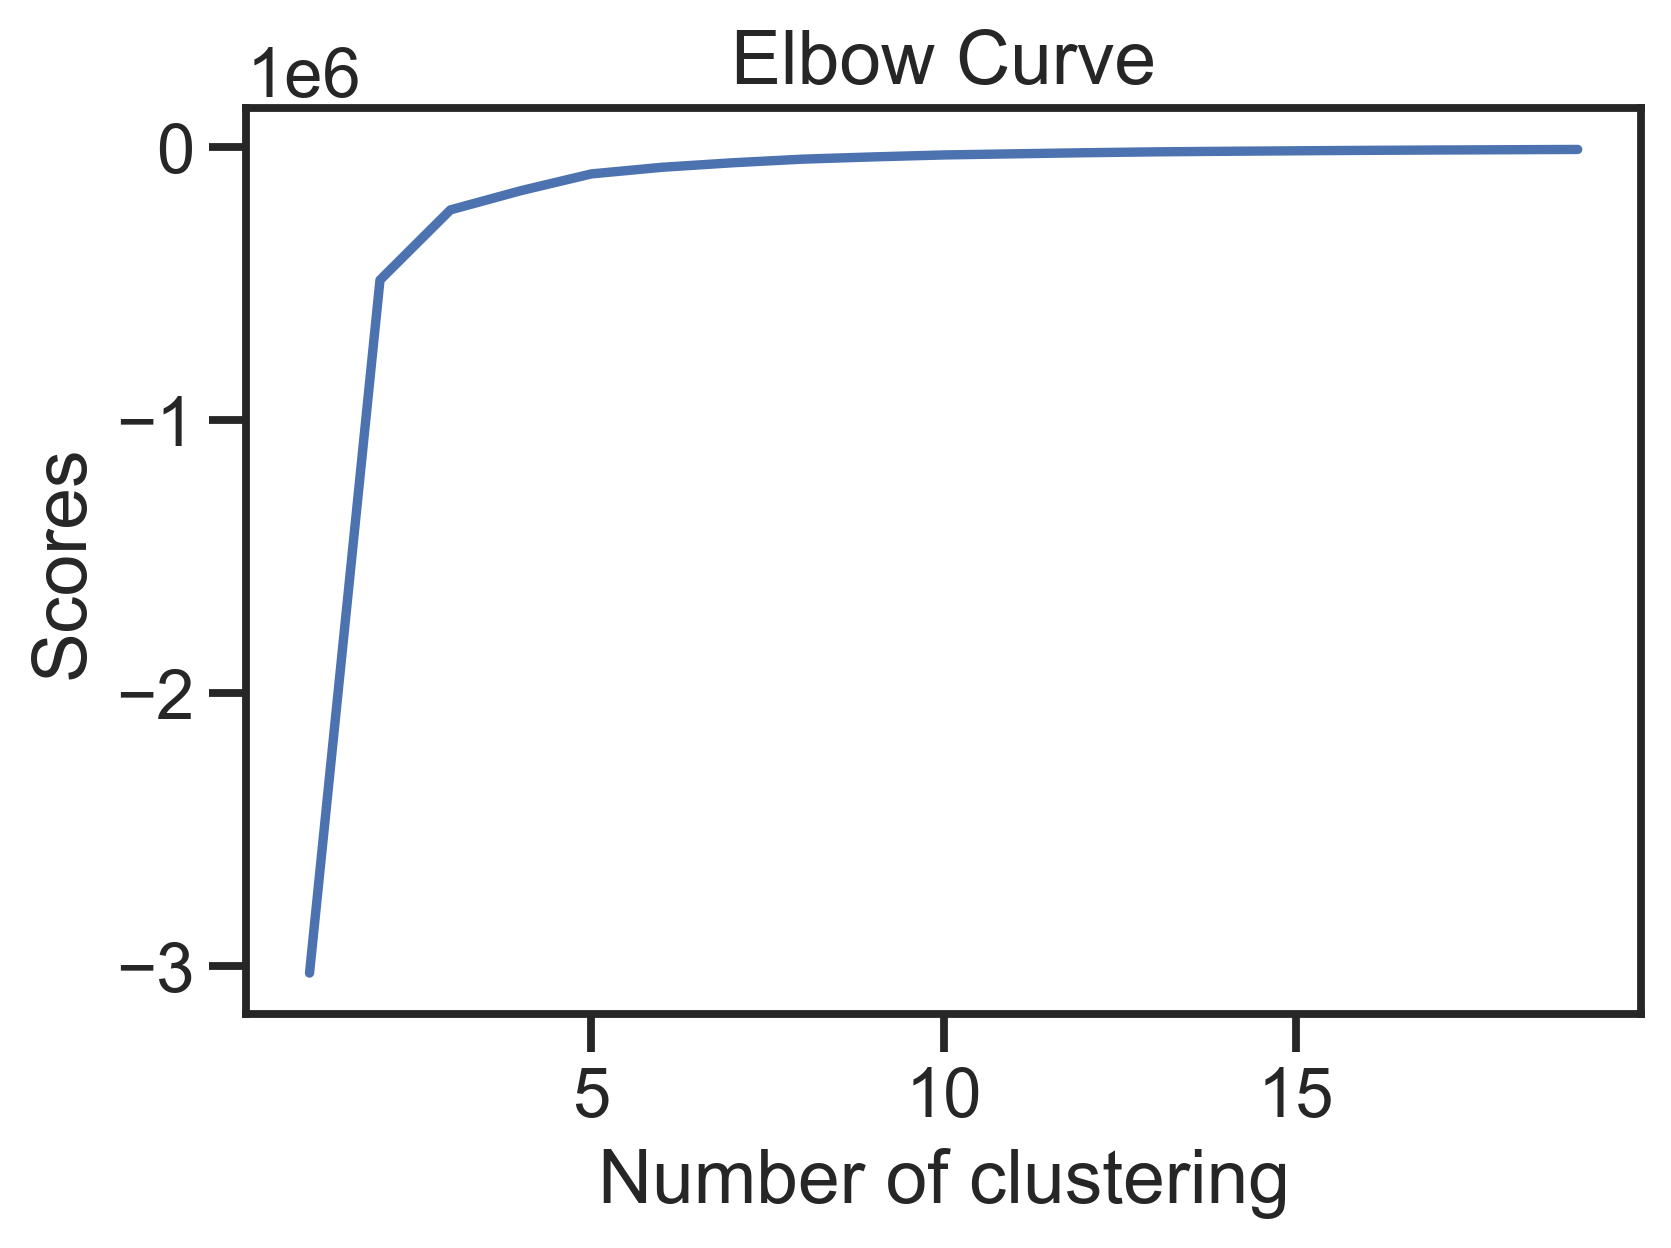

In [14]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.title("Elbow Curve")
plt.ylabel("Scores")
plt.xlabel("Number of clustering")
plt.show()

In [15]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(X)
pca_c = pca.transform(Y)

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans_output = kmeans.fit(Y)
kmeans_output

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
kmeans_output.labels_

array([2, 1, 1, ..., 2, 2, 2])

In [19]:
np.unique(kmeans_output.labels_)

array([0, 1, 2])

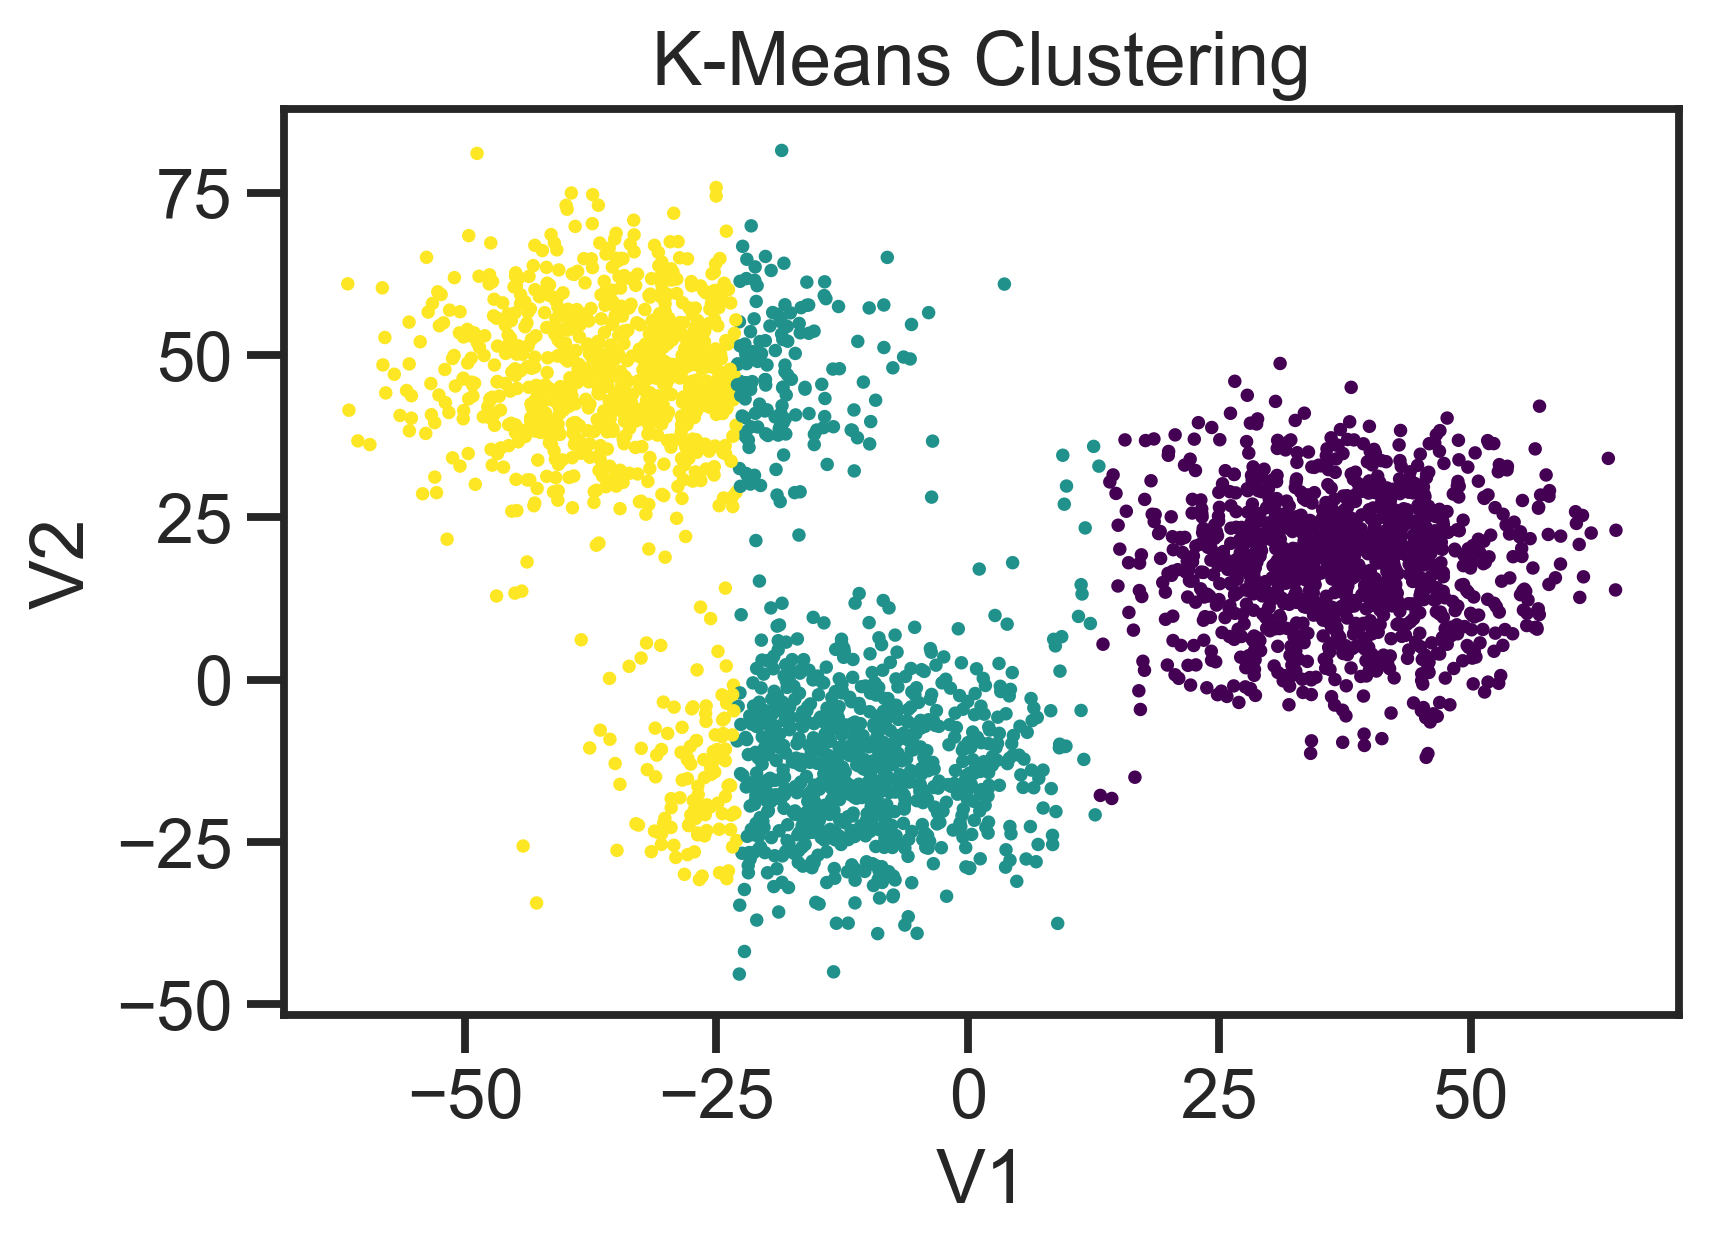

In [20]:
plt.scatter(pca_c[:,0],pca_d[:,0],c=kmeans_output.labels_,s=3,cmap="viridis")
plt.title("K-Means Clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [21]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_output = agglo.fit(Y)
agglo_output

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [22]:
agglo_output.labels_

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
np.unique(agglo_output.labels_)

array([0, 1, 2], dtype=int64)

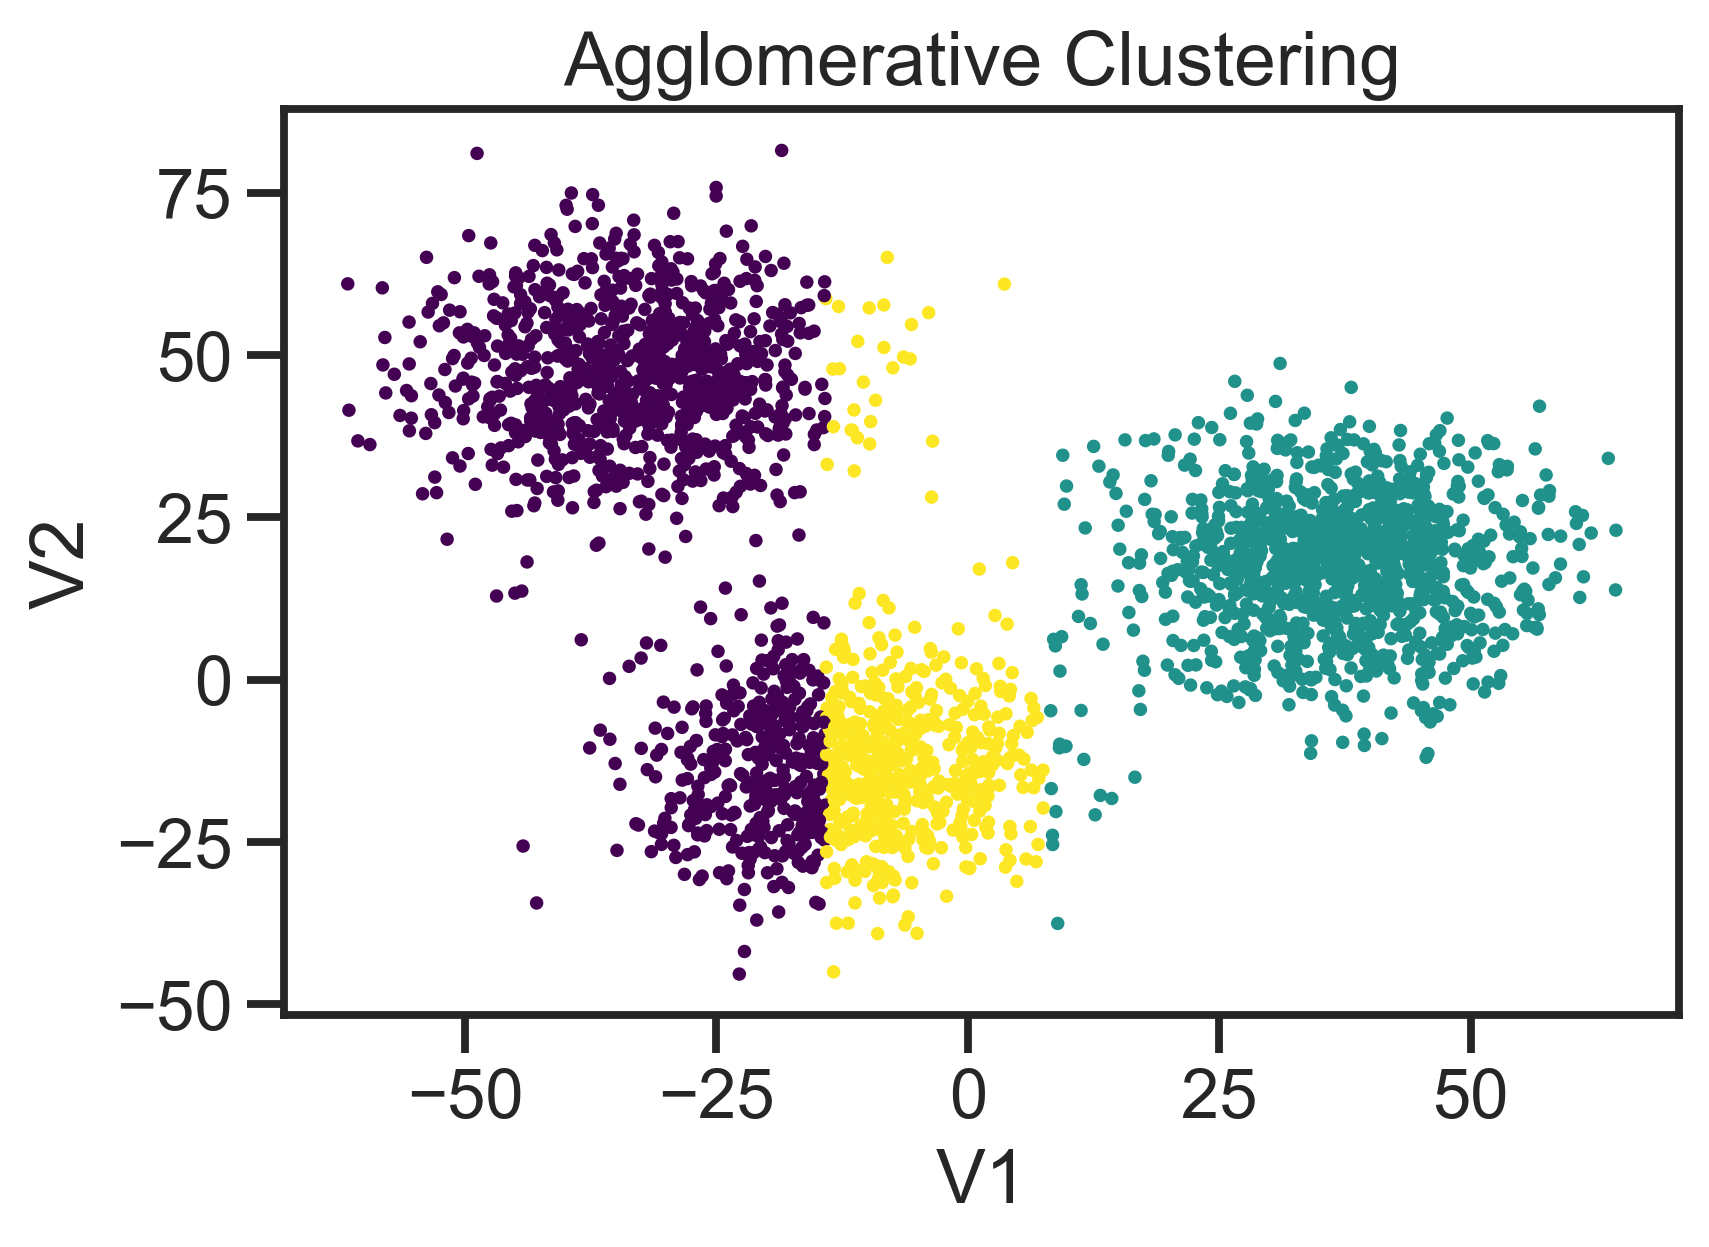

In [24]:
plt.scatter(pca_c[:,0],pca_d[:,0],c=agglo_output.labels_,s=3,cmap="viridis")
plt.title("Agglomerative Clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [25]:
dbscan = DBSCAN()
dbscan_output = dbscan.fit(Y)
dbscan_output

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [26]:
dbscan_output.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
np.unique(dbscan_output.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

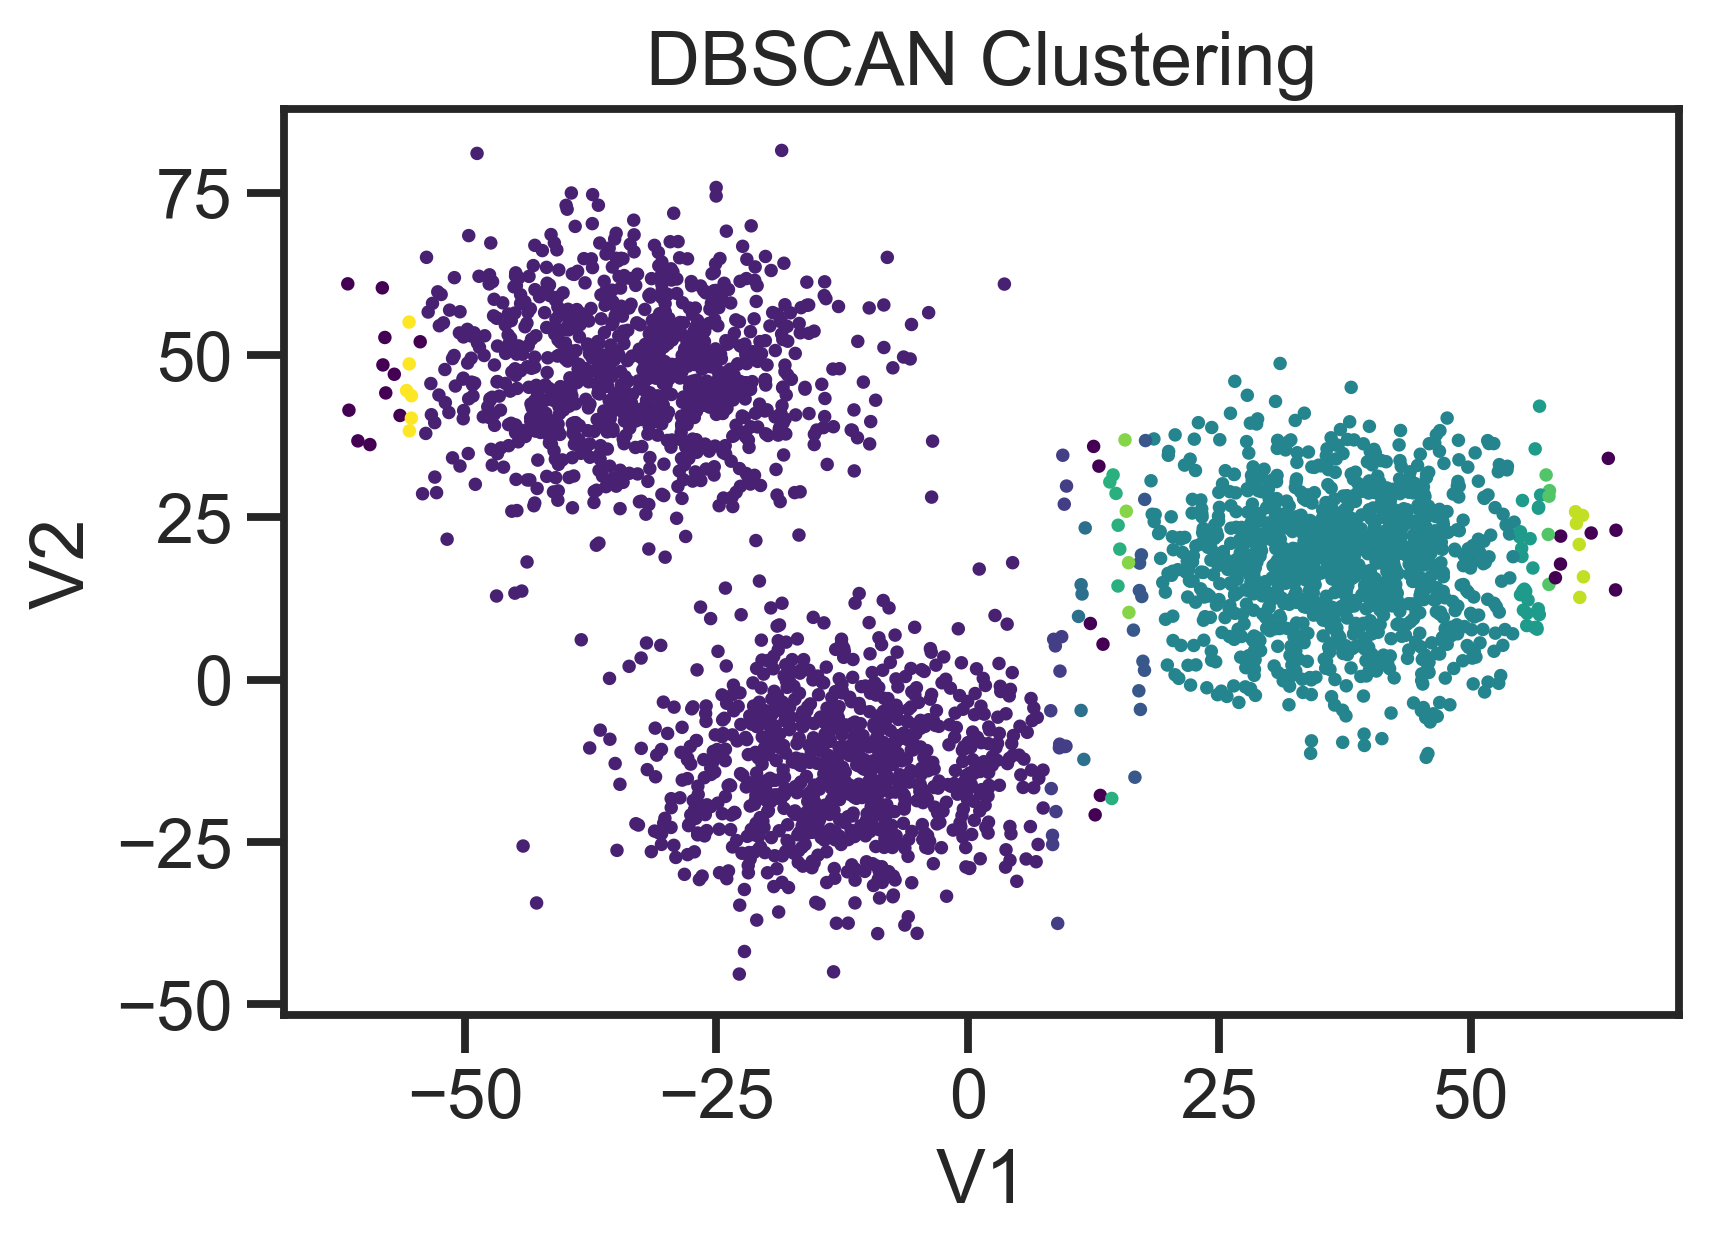

In [28]:
plt.scatter(pca_c[:,0],pca_d[:,0],c=dbscan_output.labels_,s=3,cmap="viridis")
plt.title("DBSCAN Clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()